# APS1070
#### Linear Regression - Project 4

## How to use this Notebook

1. Run the cells to get a bird's eye view of whats going on.
2. Interact with the code to better understand how it works - add cells, plot values, change parameters, etc.
3. (Optional) Replicate Linear Regression code on a blank notebook, without viewing this code. [This is called retrieval practice.](https://www.learningscientists.org/blog/2016/6/23-1)
4. Complete exercises.

## Linear Regression - Introduction

### Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. We will define a linear relationship between these two variables as follows:

$y = mX + c$

This is the equation for a line that you studied in high school. m is the slope of the line and c is the y intercept. Today we will use this equation to train our model with a given dataset and predict the value of Y for any given value of X. Our challenge today is to determine the value of m and c, such that the line corresponding to those values is the best fitting line or gives the minimum error.

Are we always fitting a line into the data? What if we have more than 1 feature (independant variable)?

The vectorized form of above equation is written as $y = Xw$, where y and w are vectors while X is a matrix. 

Where is the c term? It is included within the X matrix.

**Hypothesis of Linear Regression**

The linear regression model can be represented by the following equation:

<img src="https://miro.medium.com/max/313/1*A32yDrkQKIU0Z-Nf7JD9Pg.png">

- Y is the predicted value ($h_\theta(x)$)
- θ₀ is the bias term.
- θ₁,…,θₙ are the model parameters
- x₁, x₂,…,xₙ are the feature values.

### LR - Procedure

Our Loss function for Linear regression would be sum of squares, which makes the cost function to be:

<img src="https://miro.medium.com/max/300/1*_y5QA1yF4w6LDDRxfTt6GA.jpeg">

Here yᵢ is the actual value and ȳᵢ is the predicted value. Lets substitute the value of ȳᵢ from $y = mX + c$:

<img src="https://miro.medium.com/max/400/1*3cpC7oHy4IbH3o3Jc-ygVw.jpeg">

Partial Derivative of the above equation with respect to m is shown as $D_m$:

<img src="https://miro.medium.com/max/400/1*FvYfCBrl2gX9K-KxSO1eIw.jpeg">

While the Partial Derivative with respect to c is shown as $D_c$:

<img src="https://miro.medium.com/max/300/1*rj09w2TcBxnHPtQ0oq4ehA.jpeg">

#### Analytical Approach for Linear Regression

Can you derive the Analytical Solution for Linear Regression?

We arrive at the analytical solution when we turn the partial derivatives with respect to the parameters to zero. Why?

This is because at the point where cost function is at the minimum with respect to the parameters (m and c), the derivative of cost function with respect to the parameters would be zero.

$D_m=0$ and $D_c=0$

The solution for the general case comes out to be:

<img src="https://sebastianraschka.com/images/faq/closed-form-vs-gd/closed-form.png">

With $L_2$ Regularization. Cost:

$J(\theta) = \frac{1}{2m}[\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})^2 + \lambda\sum_{j=1}^n\theta^2_j]$

$w = (X^TX + \lambda I)^{-1}X^Ty$

#### Gradient Descent Solution

Gradient descent uses the equations for gradient derived above to find the direction in which we tinker the values of our parameters m and c. 

<img src="https://miro.medium.com/max/300/1*JDcHqFK8jLcgQu1cj2XuVQ.jpeg">

Here the term $L$ is defined as the learning rate.

<img src="https://miro.medium.com/max/864/1*CjTBNFUEI_IokEOXJ00zKw.gif">

#### Any other solutions methods?

Some other solution methods are QR Decomposition, Singular-Value Decomposition.

- Do these methods give exact solutions?
- Do these methods scale well with large datasets?

## Let's Start

Single Feature, 5 data points.

### Analytical Approach in Code

Let's get our hands dirty.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [0]:
n = 5 # number of points
m = 2 # slope of line
c = 4 # y intercept of line
r = 2 # range of data on x-axis

np.random.seed(2)
x = r * np.random.rand(n)
x.sort()
yPerf = m*x + c # perfect world: no noise
y = m*x + c + np.random.randn(n) # imperfect world: we get noisy data

In [0]:
print(x)
print(y)
print(yPerf)

[0.05185246 0.8407356  0.87064479 0.8719898  1.09932496]
[3.02924941 5.0642481  4.2402827  6.63756941 6.93819559]
[4.10370493 5.68147121 5.74128957 5.74397961 6.19864991]


Spoiler Alert: We are in an Imperfect World.

In [0]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

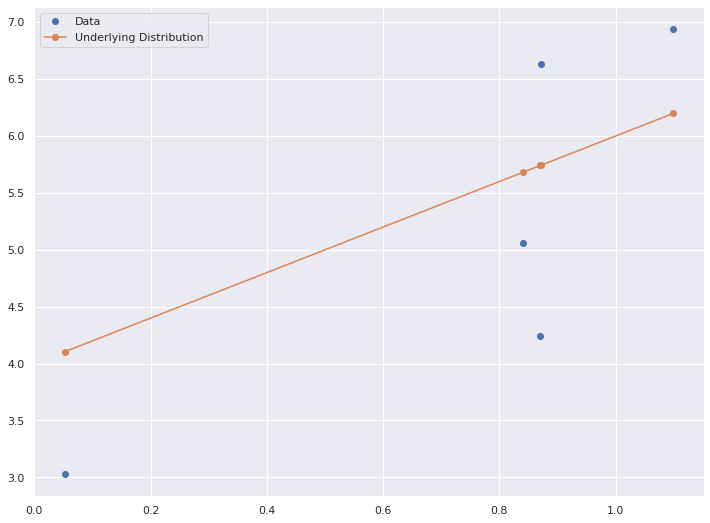

In [0]:
plt.plot(x, y, 'o', label='Data')
plt.plot(x, yPerf, 'o-', label='Underlying Distribution')

plt.legend()
plt.show()

In [0]:
x = np.vstack((np.ones(np.shape(x)), x)).T
y = y.reshape(-1, 1)

In [0]:
print(x)
print(y)

[[1.         0.05185246]
 [1.         0.8407356 ]
 [1.         0.87064479]
 [1.         0.8719898 ]
 [1.         1.09932496]]
[[3.02924941]
 [5.0642481 ]
 [4.2402827 ]
 [6.63756941]
 [6.93819559]]


In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

# prediction
yPred = np.dot(x, w)

In [0]:
w[0], w[1]

(array([2.67741212]), array([3.35314632]))

- How similar are these to the values we had set initially?
- Will they be same as those set initially if there was no noise?

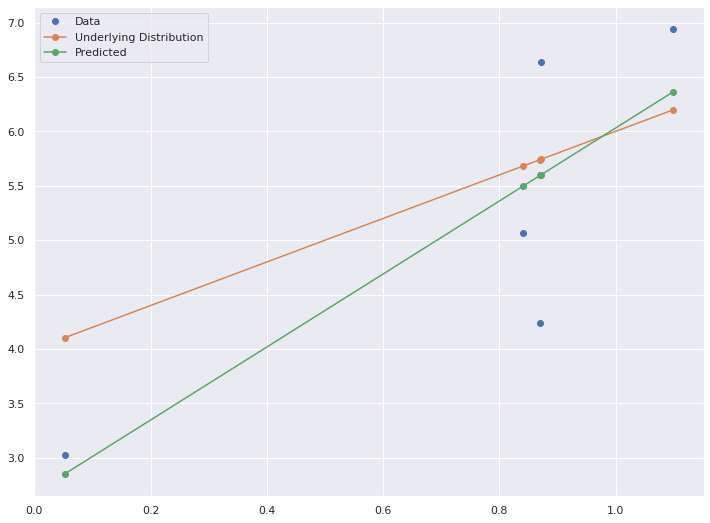

In [0]:
plt.plot(x[:, 1], y, 'o', label='Data')
plt.plot(x[:, 1], yPerf, 'o-', label='Underlying Distribution')
plt.plot(x[:, 1], yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  0.8321853483360432


### Complex Dependant Variable

It's complicated.

In [0]:
n = 20 # number of points
m = 3  # slope of line
c = 10 # y intercept of line
r = 2  # range of data on x-axis

np.random.seed(10)
X = xD = r * np.random.randn(n) # points also stored in xD (xData). will be useful later.
X.sort()
yPerf = X - 2 * (X ** 2) + 0.5 * (X ** 3)
np.random.seed(10)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(0, 5, n) # imperfect world: we get noisy data

In [0]:
print(X)
print(yPerf)
print(y)

[-3.09080058 -2.27320442 -2.15960977 -1.93013134 -1.44017112 -0.34920042
 -0.0167677   0.00858286  0.21709705  0.27027376  0.45726026  0.53102317
  0.86605238  0.89027523  1.24267195  1.43055795  2.05654816  2.40607475
  2.66317301  2.969074  ]
[-3.69601806e+01 -1.84814657e+01 -1.65235560e+01 -1.29762077e+01
 -7.08188116e+00 -6.14373202e-01 -1.73323685e-02  8.43584696e-03
  1.27950807e-01  1.34049415e-01  8.68899446e-02  4.19224004e-02
 -3.09251194e-01 -3.42093119e-01 -8.86307323e-01 -1.19861855e+00
 -2.05326005e+00 -2.20769785e+00 -2.07754334e+00 -1.57493874e+00]
[-30.30224812 -14.90507085 -24.25055748 -13.01812698  -3.97520129
  -4.21480101   1.31022556   0.55117848   0.14940796  -0.73895164
   2.25202089   6.05710927  -5.13457955   4.79927727   0.25684333
   1.02706952  -7.73627111  -1.53201346   5.34514167  -6.97396317]


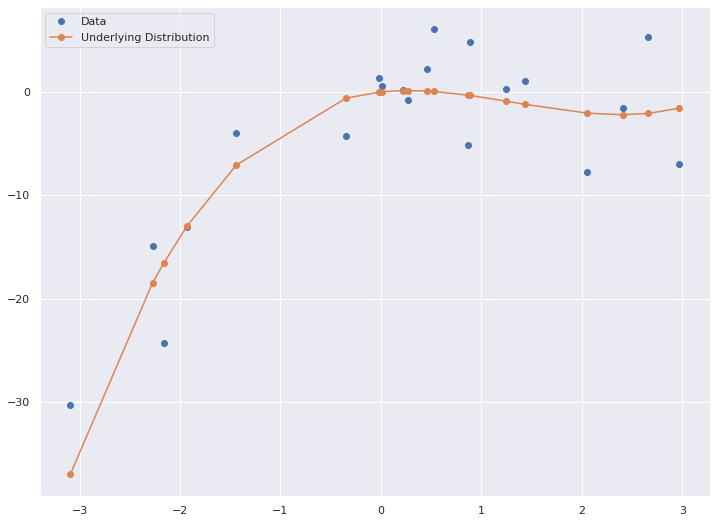

In [0]:
plt.plot(X, y, 'o', label='Data')
plt.plot(X, yPerf, 'o-', label='Underlying Distribution')

plt.legend()
plt.show()

In [0]:
X = np.vstack((np.ones(np.shape(X)), X)).T
y = y.reshape(-1, 1)

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPredLinear = yPred = np.dot(X, w)

w

array([[-5.45917353],
       [ 3.82202654]])

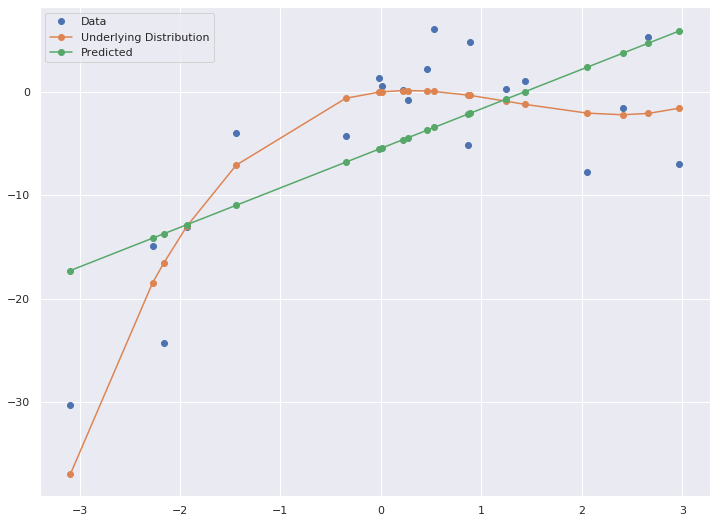

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  6.839531223681816


#### What to do next?

Can we add more features.

In [0]:
X = np.vstack((X.T, xD**2, xD**3)).T

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPred4Feature = yPred = np.dot(X, w)

In [0]:
w

array([[ 0.04177438],
       [ 2.58652514],
       [-1.87142105],
       [ 0.19655185]])

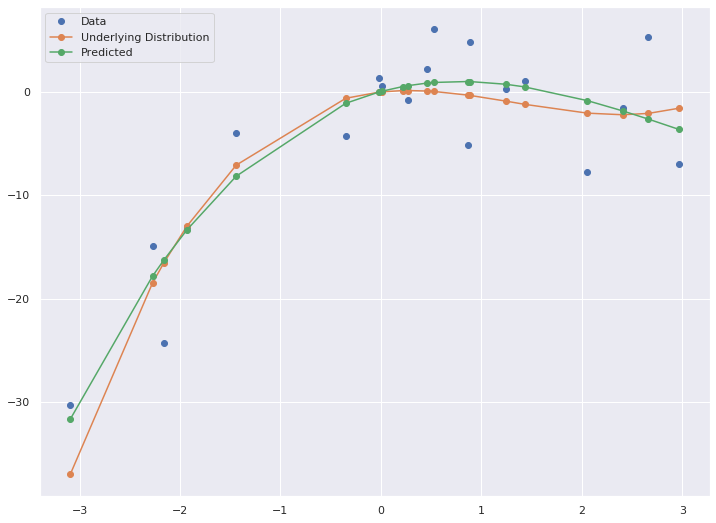

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  3.929493007090521


But how do we know when to stop, since we would not be knowing when to stop adding features in x.

In [0]:
X = np.vstack((X.T, xD**4, xD**5, xD**6, xD**7)).T

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPred8Feature = yPred = np.dot(X, w)

In [0]:
w

array([[-2.64611130e-01],
       [ 8.28612458e+00],
       [-2.07703327e+00],
       [-6.35661778e+00],
       [-1.30720676e-02],
       [ 1.64293567e+00],
       [-2.08380043e-03],
       [-1.09229711e-01]])

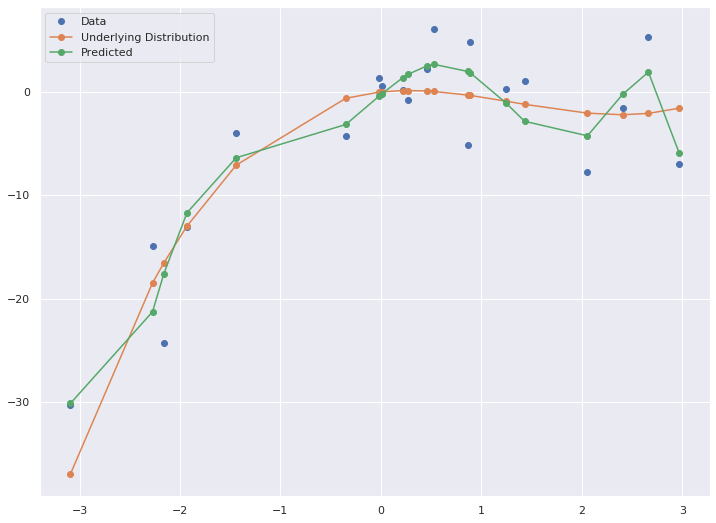

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  3.3097843019929725


Even though RMSE here (with much more higher features) is lower than previous case, we can see this Predicted Line is quite far from the Underlying distribution. This is called **Overfitting**.

When does the model overfits: when we have more features or comparitively less data for the model.

What exactly is overfitting:
It pays more attention to the noise of the data provided, in a sense trying to rotely memorize everything, 
without generalizing. 

Since we don't know when to stop adding features, what can be done:
- Solution is to work with a model or feature set that can slightly overfit your data, and then use techniques to prevent overfitting from happening.
The alternative gives us underfitting which we cannot fix unless you modify the feature set or model.

Options we have to prevent overfitting. Well there are many, most widely used ones are
- Using a validation set
- Regularization: add penalty on weights

In [0]:
λ = 10 # what is lambda: regularization parameter
f = 8 # number of features

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X) + (λ)*np.identity(f)), np.dot(X.T, y))

# prediction
yPred8FeatRegu = yPred = np.dot(X, w)
w

array([[ 0.21326186],
       [ 0.40727946],
       [-0.46745243],
       [-0.31891582],
       [-0.51080301],
       [ 0.38864889],
       [ 0.03613141],
       [-0.03367748]])

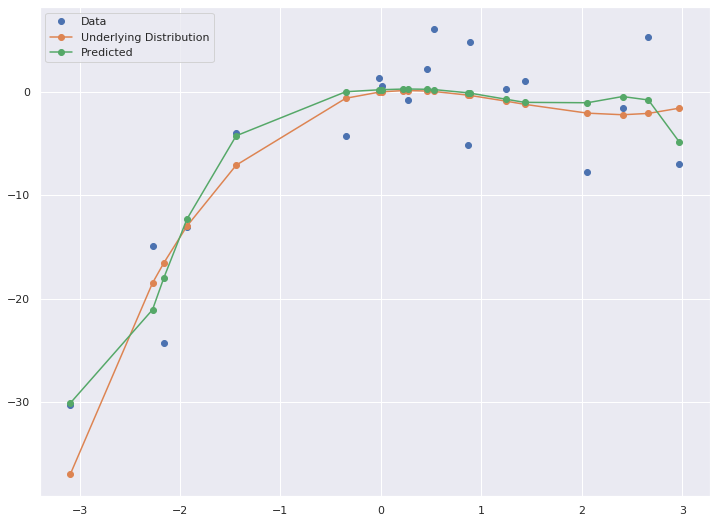

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

Can we know from the plot if the value of λ is optimal:

Somewhat but not exactly. 

To get the exact value of lambda you need to split dataset between training and testing. Then cycle over multiple values of lambda. The most optimum is the one which gives the lowest test error. 

What does low test error represent?

All models together:

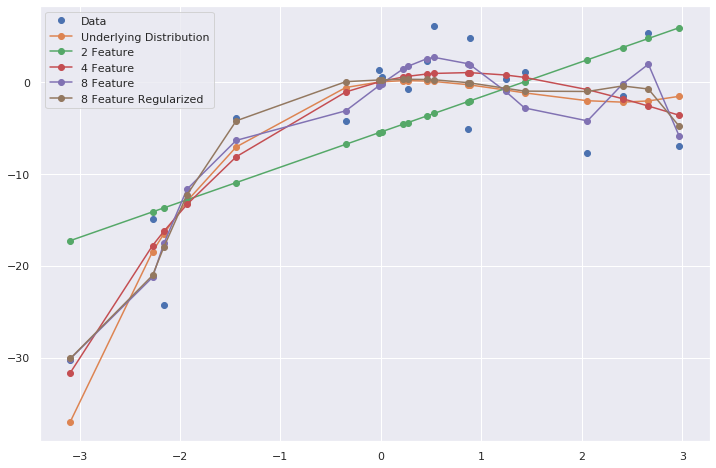

In [0]:
plt.figure(figsize=(12, 8))
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPredLinear, 'o-', label='2 Feature')
plt.plot(xD, yPred4Feature, 'o-', label='4 Feature')
plt.plot(xD, yPred8Feature, 'o-', label='8 Feature')
plt.plot(xD, yPred8FeatRegu, 'o-', label='8 Feature Regularized')

plt.legend()
plt.show()

### Further Complex Multivariate Data

We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

In [0]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [0]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [0]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We can see that the target value by the name MEDV is missing from the dataframe. It is present in dataset.target.
Let's add that to the df.

In [0]:
df['MEDV'] = dataset.target

Are there any null values in the dataset?

In [0]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Even though there are none, it's a good practice to check.

#### Exploratory Data Analysis

We here use distplot method from the seaborn library, which is another popular graphing library for Python.

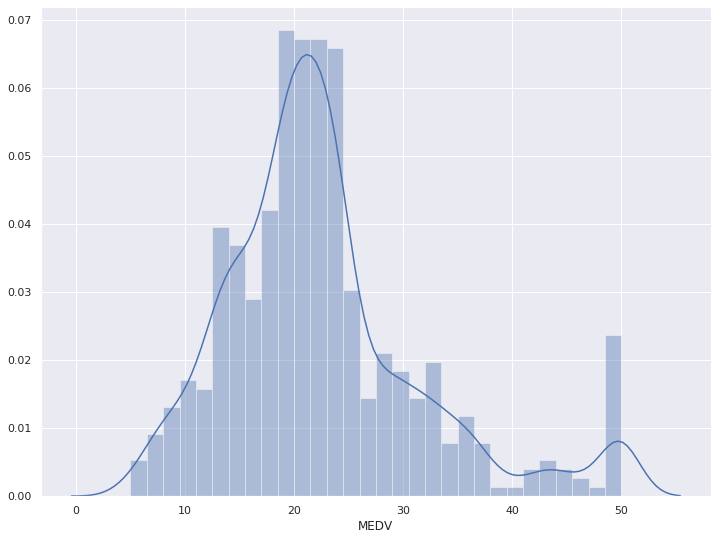

In [0]:
sns.set(rc={'figure.figsize':(12, 9)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

We can see that it mostly normally distributed with a few outliers.

## Linear Regression - Assignment

We'll work with the above dataset for the assignment below. Create a blank notebook for the assignment.

### Question 1

1. Normalize the data using StandardScaler from sklearn. [0.5]
2. Split the multivariate data into training/validation data (20% validation data) and plot train error and validation error as a function of the lambda regularizer. [1]
3. What is the best lambda where the best fit occurs? Use this best lambda from here on out. [Note: You may be surprised by the best lambda here - this won't be the case for all datasets.] [1]

**The best fit occurs at lambda = 0 since it has lowest training error**

In [0]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
X = df.iloc[:,0:13].values
y = df.iloc[:,13].values

In [0]:
# 1.1 normalize the data
X_std = StandardScaler().fit_transform(X)
column_to_be_added = np.ones((506,1))
X_3 = np.hstack((column_to_be_added,X_std))

In [0]:
# 1.2 Split the training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_3, y, test_size=0.2,random_state=0)

In [0]:
lams = np.arange(100)
train_error,val_error=[],[]
for lam in lams:
  w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)+lam*np.identity(14)), np.dot(X_train.T, y_train))
  y_train_pred = np.dot(X_train,w)
  y_val_pred = np.dot(X_val,w)
  train_error.append(mean_squared_error(y_train,y_train_pred))
  val_error.append(mean_squared_error(y_val,y_val_pred))

In [7]:
# 1.3 Find the best lam value
best = val_error.index(min(val_error))
print('The best lam value result in minimum error is',lams[best])

The best lam value result in minimum error is 0


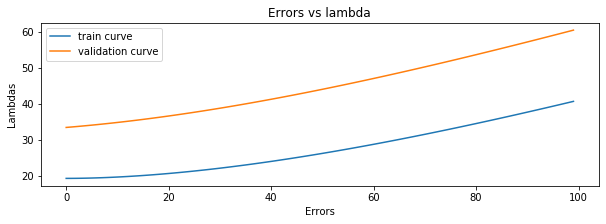

In [8]:
# 1.2 Plot the train error and validation error as a function of the lambda regularizer
fig = plt.figure(figsize=(10, 3))
plt.plot(lams,train_error,label='train curve')
plt.plot(lams,val_error,label='validation curve')
plt.title("Errors vs lambda")
plt.ylabel('Lambdas')
plt.xlabel('Errors')
plt.legend()
plt.show()

### Question 2

1. Derive the gradient of the $L_2$ regularized objective for Linear Regression, $\frac{\partial}{\partial \theta_j}J(\theta)$. Show your work (either by using in-line equations like we do here, or taking a picture of your work, and emdedding it in the notebook). [1]

$J(\theta) = \frac{1}{2m}[\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})^2 + \lambda\sum_{j=1}^n\theta^2_j] = \frac{1}{2m}[\sum_{i=1}^m(\theta_j x^{(i)} - y^{(i)})^2 + \lambda\sum_{j=1}^n\theta^2_j]$

$\frac{dJ(\theta)}{d\theta_j} = \frac{1}{2m}[2\sum_{i=1}^mx^{(i)}(\theta_j x^{(i)} - y^{(i)})+ 2\lambda\sum_{j=1}^n\theta_j] = \frac{1}{m}[\sum_{i=1}^mx^{(i)}(\theta_j x^{(i)} - y^{(i)})+ \lambda\sum_{j=1}^n\theta_j]$ 

$\theta_j = \theta_j - eta * \frac{1}{m}[\sum_{i=1}^mx^{(i)}(\theta_j x^{(i)} - y^{(i)})+ \lambda\sum_{j=1}^n\theta_j]$ 

### Question 3



```
# This is formatted as code
```

1. Implement batch gradient descent for linear regression using a fixed learning rate $\eta$ of 1e-2. [1.5]

2. Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results closely approximate the matrix solution with the same lambda. [1]

In [9]:
# Gradient descent method
theta = np.zeros(14)
L = 0.01
lam = 0
iterations = 15000
costs=[]

for i in range(iterations):
  h = X_train.dot(theta)
  J_reg = lam / (2*X_train.shape[0]) * np.sum(np.square(theta))
  cost = (h - y_train).T @ (h - y_train)/(2*X_train.shape[0])+J_reg
  costs.append(cost)
  gra_theta = (1/X_train.shape[0])* (  (X_train.T.dot(h-y_train)) + lam * theta )
  theta = theta - L * gra_theta  
print('Weight is \n',theta)

Weight is 
 [22.4803552  -1.02637369  1.04333245  0.03754984  0.59396853 -1.86650627
  2.6032344  -0.08777467 -2.9164645   2.12391465 -1.85021263 -2.26211901
  0.73967677 -3.51558074]


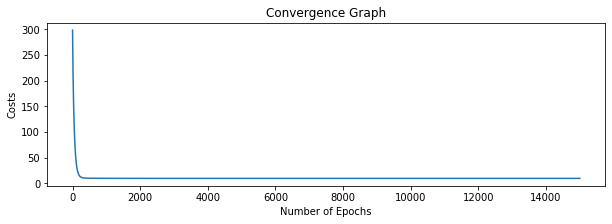

In [10]:
# Convergence Graph
plt.figure(figsize=(10,3))
plt.plot(costs)
plt.title('Convergence Graph')
plt.xlabel('Number of Epochs')
plt.ylabel('Costs')
plt.show()

In [11]:
# analytical solution
lam = 0
w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)+lam*np.identity(14)), np.dot(X_train.T, y_train))
w

array([22.48035288, -1.02638248,  1.0433458 ,  0.03759363,  0.59396238,
       -1.86651867,  2.60322635, -0.08776804, -2.91646482,  2.12402208,
       -1.85033055, -2.26212378,  0.73967912, -3.5155841 ])

In [12]:
# percentage difference between analytical solution and gradient descent
np.mean((w-theta)/theta*100)

0.008755374844861047

### Question 4

1. Plot training error performance vs. number of epochs as a function of learning rate $\eta$ for a range of values {1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1} with each $\eta$ being a different line. [1]

For very low $\eta$, gradient descent should be slow to converge.  For very high $\eta$, the error might be very unstable (i.e., not decreasing on every epoch).

In [0]:
# calculate errors for each learning rate
lam = 0
iterations = 1000
Ls = [0.000001,0.00001,0.0001,0.001,0.01,0.1]
errors = []

for L in Ls:
  theta = np.zeros(14)
  for i in range(iterations):
    h = X_train.dot(theta)
    J_reg = lam / (2*X.shape[0]) * np.sum(np.square(theta))
    gra_theta = (1/X.shape[0])* (  (X_train.T.dot(h-y_train)) + lam * theta )
    theta = theta - L * gra_theta
    errors.append(mean_squared_error(y_train,h))

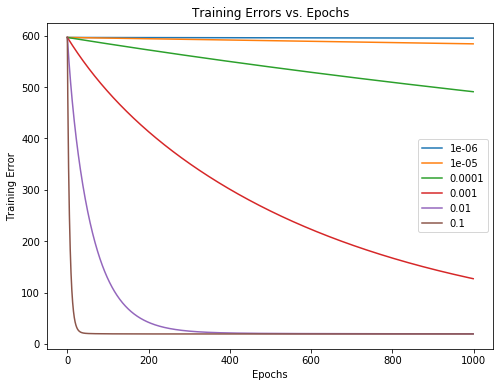

In [14]:
error_epoch =[]
i,j = 0,1000
for a in range(6):
  error_epoch.append(errors[i:j])
  i+=1000
  j+=1000 
fig = plt.figure(figsize=(8,6))
for i in range(6):
  plt.plot(error_epoch[i],label=Ls[i])
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Training Error')
  plt.title('Training Errors vs. Epochs')

### Question 5

Implement a mini-batch version with a batch_size constant B.  When B=1, it is stochastic gradient descent.  When B=#train data points, it is full-batch.  Anywhere in between is mini-batch.  

1. Choose B=1, B=16, B=128, B=256, and B=#data points and plot training error as a function of "# of gradient updates" and also separately as a function of "wall-clock time" for each value of B. [2]

2. All lines should be on the same plot. Which B leads to fastest convergence in terms of #gradient updates and in terms of "wall-clock time"? [1]

**For both 'training error vs. # of gradient updates' and 'training error vs. time'curves, batch size = 1 leads to the fast convergence. The reaspn behind this is: for batch gradient descent, ALL the samples in training set will be used to do a single update for a parameter in a particular iteration, however, in stochastic gradient descent, ONLY ONE training sample from  training set to do the update for a parameter in a particular iteration. Therefore, we update the weights very quickly and the costs get to the convergence very quickly.**

In [0]:
# function to implement batch gradient descent
def batchGradientDescent_abs(X,y,w,bs,iterations=20,lr=0.01,lam=0):
  m,n=X.shape
  costHistory = np.zeros(iterations)
  timeHistory = np.zeros(iterations)
  errorHistory = np.zeros(iterations)
  start = time.time()
  countHistory = np.zeros(iterations)
  count=0
  for i in range(iterations):
    np.random.seed(42)
    data = np.random.permutation(np.hstack((X,y)))    #randomly select training data for each iteration
    X = data[:,:-1]
    y = data[:,-1].reshape(-1,1)

    for j in range(0,m,bs):
      
      X_batched = X[j:j+bs,:]     #extract features and labels for different batch size
      y_batched = y[j:j+bs]
      
      h = X_batched.dot(w)
      gra_w = (X_batched.T.dot(h-y_batched)+lam * w)/(X_batched.shape[0])   #gradient
      w = w - lr * gra_w   #update
      count += 1

    end = time.time()
    timeHistory[i]= end-start
    preds = np.dot(X,w)
    costHistory[i] = (preds - y).T @ (preds - y)/(2*m)
    errorHistory[i] = mean_squared_error(preds,y)
    countHistory[i] = count
      
  return costHistory, errorHistory,timeHistory, countHistory

In [0]:
# get values from above function and assign values
np.random.seed(42)
costs5=[]
error5=[]
times5=[]
counts5=[]
B=[1,16,128,256,404]
for b in B:
    cost5,e5, t5,c5 = batchGradientDescent_abs(X=X_train, y=y_train.reshape(-1,1), w=np.random.randn(14,1), bs=b)
    costs5.append(cost5)
    error5.append(e5)
    times5.append(t5)
    counts5.append(c5)

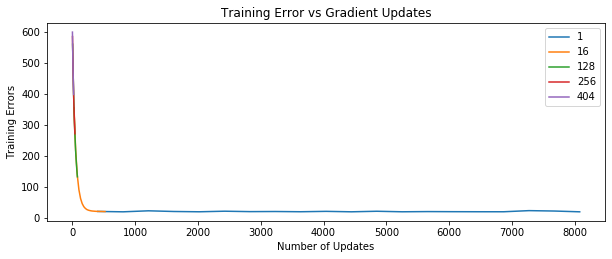

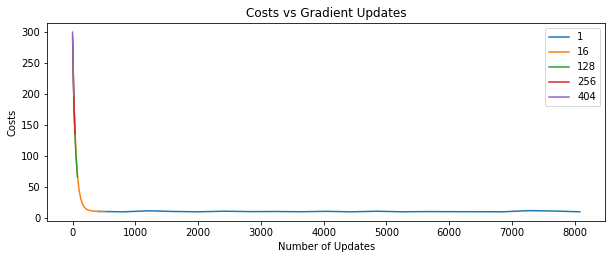

In [17]:
# plot training errors vs. number of gradient updates
fig = plt.figure(figsize=(10,8)) 
plt.subplot(2,1,1)
for count,b in enumerate(B,0):
    plt.plot(counts5[count],error5[count],label='%d' %b)
plt.title("Training Error vs Gradient Updates")
plt.xlabel("Number of Updates")
plt.ylabel("Training Errors")
plt.legend()
plt.show()

# plot costs vs. number of gradient updates
fig = plt.figure(figsize=(10,8)) 
plt.subplot(2,1,2)
for count,b in enumerate(B,0):
    plt.plot(counts5[count],costs5[count],label='%d' %b)
plt.title("Costs vs Gradient Updates")
plt.xlabel("Number of Updates")
plt.ylabel("Costs")
plt.legend()
plt.show()

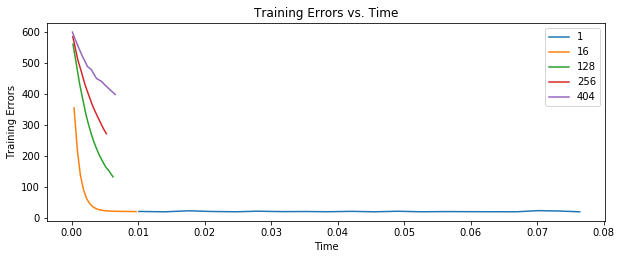

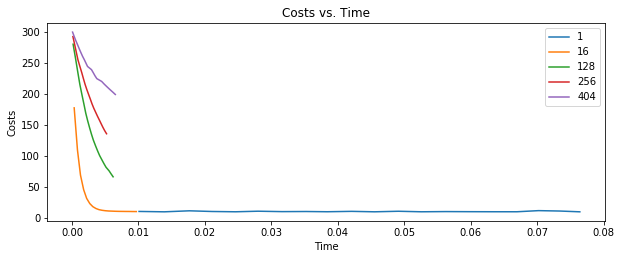

In [18]:
# plot training errors vs. time
fig = plt.figure(figsize=(10,8)) 
plt.subplot(2,1,1)
for count,b in enumerate(B,0):
    plt.plot(times5[count],error5[count],label='%d' %b)
plt.title("Training Errors vs. Time")
plt.xlabel("Time")
plt.ylabel("Training Errors")
plt.legend()
plt.show()

# plot costs vs. time
fig = plt.figure(figsize=(10,8)) 
plt.plot(2,1,2)
plt.subplot(2,1,2)
for count,b in enumerate(B,0):
    plt.plot(times5[count],costs5[count],label='%d' %b)
plt.title("Costs vs. Time")
plt.xlabel("Time")
plt.ylabel("Costs")
plt.legend()
plt.show()

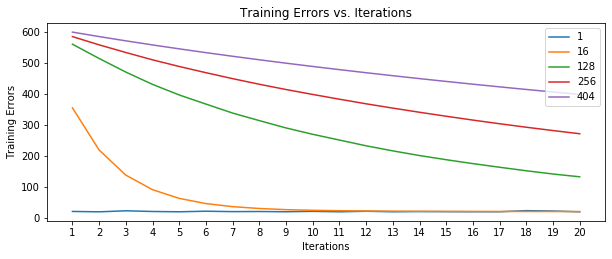

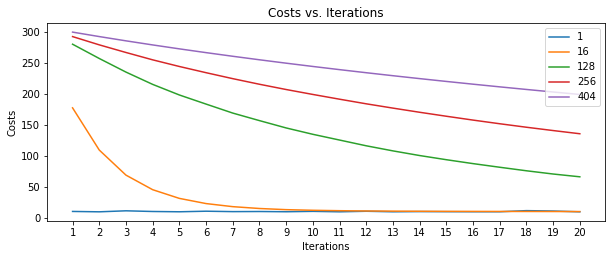

In [19]:
# plot training errors vs. number of iterations
fig = plt.figure(figsize=(10,8)) 
plt.subplot(2,1,1)
for count,b in enumerate(B,0):
    plt.plot(np.arange(1,21).astype(str),error5[count],label='%d' %b)
plt.title("Training Errors vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Training Errors")
plt.legend()
plt.show()

# plot costs vs. number of iterations
fig = plt.figure(figsize=(10,8)) 
plt.subplot(2,1,2)
for count,b in enumerate(B,0):
    plt.plot(np.arange(1,21).astype(str),costs5[count],label='%d' %b)
plt.title("Costs vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Costs")
plt.legend()
plt.show()

### Question 6

1. Switch to absolute error for loss but still use $L_2$ regularization. Derive the gradient for this case, $\frac{\partial}{\partial \theta_j}J(\theta)$. [1.5]

$J(\theta) = \frac{1}{2m}[\sum_{i=1}^m|h_\theta (x^{(i)}) - y^{(i)}| + \lambda\sum_{j=1}^n\theta^2_j] = \frac{1}{2m}[\sum_{i=1}^m|\theta_j x^{(i)} - y^{(i)}|+ \lambda\sum_{j=1}^n\theta^2_j]$

$\frac{dJ(\theta)}{d\theta_j} = \frac{1}{2m}[\sum_{i=1}^mx^{(i)}\frac{(\theta_j x^{(i)} - y^{(i)})}{|\theta_j x^{(i)} - y^{(i)}|}+ 2\lambda\sum_{j=1}^n\theta_j]$ 

$\theta_j = \theta_j - eta * \frac{1}{2m}[\sum_{i=1}^mx^{(i)}\frac{(\theta_j x^{(i)} - y^{(i)})}{|\theta_j x^{(i)} - y^{(i)}|}+ 2\lambda\sum_{j=1}^n\theta_j]$

2. Tune $\eta$ and B to obtain good performance (fast convergence to minimum error, but not noisy).  Is it easier to train with squared error or absolute error, why?  Show some plots that help you demonstrate this point and explain. [1]



**Squared loss function is easier to train. According the graphs "training errors vs time" and "training errors vs iterations". We can see it take longer time for absolute loss function to get convergence and it also takes more iterations to decrease the training errors to a same number as squared loss function. In training process, we want to get the training done as soon as possible, so squared loss function can help us achieve this.**

In [0]:
def batchGradientDescent_abs(X,y,w,bs,iterations=20,lr=0.05,lam=0):
  m,n=X.shape
  costHistory = np.zeros(iterations)
  timeHistory = np.zeros(iterations)
  errorHistory = np.zeros(iterations)
  start = time.time()
  countHistory = np.zeros(iterations)
  count=0
  for i in range(iterations):
    np.random.seed(42)
    data = np.random.permutation(np.hstack((X,y)))
    X = data[:,:-1]
    y = data[:,-1].reshape(-1,1)

    for j in range(0,m,bs):
      
      X_batched = X[j:j+bs,:]
      y_batched = y[j:j+bs]
      
      h = X_batched.dot(w)
      gra_w = (X_batched.T.dot((h-y_batched)/np.absolute(h-y_batched)) + 2 * lam * w)/(2*X_batched.shape[0])
      w = w - lr * gra_w
      count += 1
    
    end = time.time()
    timeHistory[i]= end-start
    preds = np.dot(X,w)
    costHistory[i] = (preds - y).T @ (preds - y)/(2*m)
    errorHistory[i] = mean_squared_error(preds,y)
    countHistory[i] = count
      
  return costHistory, errorHistory, timeHistory, countHistory

In [0]:
np.random.seed(42)
costs6=[]
error6=[]
times6=[]
counts6=[]
B=[1,16,128,256,404]
for b in B:
    cost6,e6,t6,c6 = batchGradientDescent_abs(X=X_train, y=y_train.reshape(-1,1), w=np.random.randn(14,1), bs=b)
    costs6.append(cost6)
    error6.append(e6)
    times6.append(t6)
    counts6.append(c6)

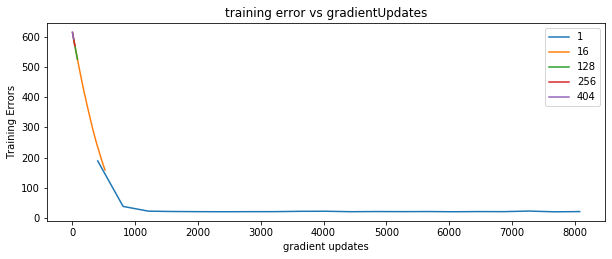

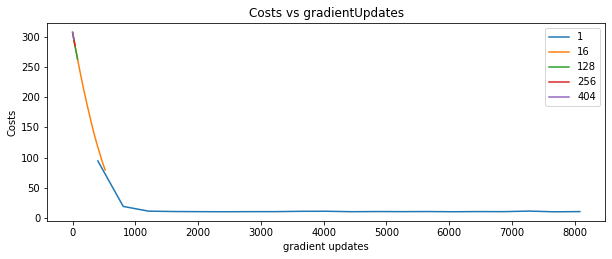

In [22]:
# plot training errors vs number of gradient updates
fig = plt.figure(figsize=(10,8)) 
plt.subplot(2,1,1)
for count,b in enumerate(B,0):
    plt.plot(counts6[count],error6[count],label='%d' %b)
plt.title("training error vs gradientUpdates")
plt.xlabel("gradient updates")
plt.ylabel("Training Errors")
plt.legend()
plt.show()

# plot costs vs number of gradient updates
fig = plt.figure(figsize=(10,8)) 
plt.subplot(2,1,2)
for count,b in enumerate(B,0):
    plt.plot(counts6[count],costs6[count],label='%d' %b)
plt.title("Costs vs gradientUpdates")
plt.xlabel("gradient updates")
plt.ylabel("Costs")
plt.legend()
plt.show()

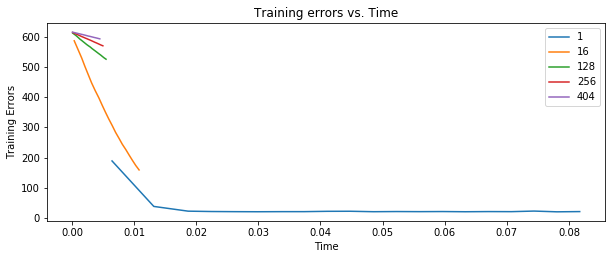

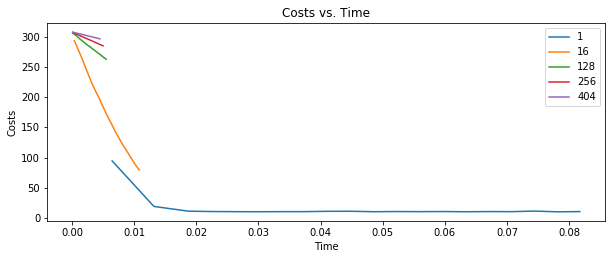

In [23]:
# plot training errors vs. time
fig = plt.figure(figsize=(10,8))
plt.subplot(2,1,1) 
for count,b in enumerate(B,0):
    plt.plot(times6[count],error6[count],label='%d' %b)
plt.title("Training errors vs. Time")
plt.xlabel("Time")
plt.ylabel("Training Errors")
plt.legend()
plt.show()

# plot costs vs. time
fig = plt.figure(figsize=(10,8))
plt.subplot(2,1,2) 
for count,b in enumerate(B,0):
    plt.plot(times6[count],costs6[count],label='%d' %b)
plt.title("Costs vs. Time")
plt.xlabel("Time")
plt.ylabel("Costs")
plt.legend()
plt.show()

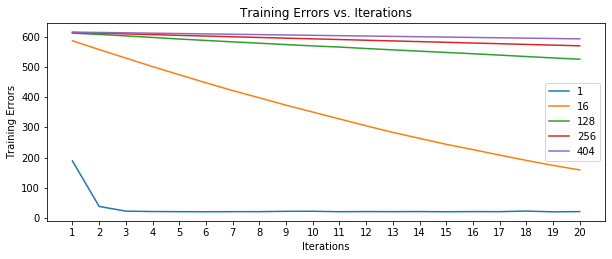

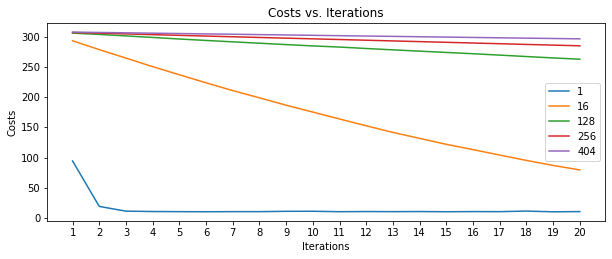

In [35]:
# plot traning errors vs. number of iterations
fig = plt.figure(figsize=(10,8))
plt.subplot(2,1,1) 
for count,b in enumerate(B,0):
    plt.plot(np.arange(1,21).astype(str),error6[count],label='%d' %b)
plt.title("Training Errors vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Training Errors")
plt.legend()
plt.show()

# plot costs vs. number of iterations
fig = plt.figure(figsize=(10,8))
plt.subplot(2,1,2) 
for count,b in enumerate(B,0):
    plt.plot(np.arange(1,21).astype(str),costs6[count],label='%d' %b)
plt.title("Costs vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Costs")
plt.legend()
plt.show()

### Question 7 (Optional)

1. Does the model perform better if polynomial features are added (Use sklearn.preprocessing.PolynomialFeatures to test it out).


2. Does the optimal value of λ (regularization constant) change with this new set of features added.

## References

Linear Regression:
1. https://sebastianraschka.com/faq/docs/closed-form-vs-gd.html

Gradient Descent (images and equations):
1. https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
2. https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

Author: Parth Jaggi